In [ ]:
#1. DO essential imports
#2. encode the dataset
#3. Create/Compile the baseline model
#4. Train the baseline model
#5. Create/Compile the smaller model
#6. Train the smaller model

In [19]:
#essential imports
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

In [4]:
NUM_WORDS = 10000
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words = NUM_WORDS)

#return the multiword sequence in one hot vector
def multihot_sequences(sequences, dimension):
    #create zeros of shape len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

print("Encoding training set:- ")
train_data = multihot_sequences(train_data, dimension=NUM_WORDS)
print("Encoding test set:- ")
test_data  = multihot_sequences(test_data, dimension=NUM_WORDS)

In [ ]:
plt.plot(train_data[0])

In [6]:
#baseline model setup
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS, )),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])
baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [8]:
#baseline model training
baseline_history = baseline_model.fit(train_data, train_labels,
                                       epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)
# baseline_history = baseline_model.fit(train_data,
#                                       train_labels,
#                                       epochs=20,
#                                       batch_size=512,
#                                       validation_data=(test_data, test_labels),
#                                       verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.4832 - acc: 0.8078 - binary_crossentropy: 0.4832 - val_loss: 0.3306 - val_acc: 0.8750 - val_binary_crossentropy: 0.3306
Epoch 2/20
 - 4s - loss: 0.2419 - acc: 0.9105 - binary_crossentropy: 0.2419 - val_loss: 0.2813 - val_acc: 0.8882 - val_binary_crossentropy: 0.2813
Epoch 3/20
 - 4s - loss: 0.1753 - acc: 0.9387 - binary_crossentropy: 0.1753 - val_loss: 0.2932 - val_acc: 0.8853 - val_binary_crossentropy: 0.2932
Epoch 4/20
 - 4s - loss: 0.1386 - acc: 0.9537 - binary_crossentropy: 0.1386 - val_loss: 0.3194 - val_acc: 0.8785 - val_binary_crossentropy: 0.3194
Epoch 5/20
 - 4s - loss: 0.1138 - acc: 0.9628 - binary_crossentropy: 0.1138 - val_loss: 0.3532 - val_acc: 0.8734 - val_binary_crossentropy: 0.3532
Epoch 6/20
 - 4s - loss: 0.0945 - acc: 0.9704 - binary_crossentropy: 0.0945 - val_loss: 0.3905 - val_acc: 0.8682 - val_binary_crossentropy: 0.3905
Epoch 7/20
 - 4s - loss: 0.0765 - acc: 0.9778 - binary_crossentropy:

In [9]:
#smaller model
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS, )),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
smaller_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])
smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [11]:
smaller_history = smaller_model.fit(train_data, train_labels, epochs=20, batch_size = 512, validation_data= (test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.4075 - acc: 0.8701 - binary_crossentropy: 0.4075 - val_loss: 0.3629 - val_acc: 0.8748 - val_binary_crossentropy: 0.3629
Epoch 2/20
 - 5s - loss: 0.2867 - acc: 0.9067 - binary_crossentropy: 0.2867 - val_loss: 0.3079 - val_acc: 0.8845 - val_binary_crossentropy: 0.3079
Epoch 3/20
 - 4s - loss: 0.2289 - acc: 0.9252 - binary_crossentropy: 0.2289 - val_loss: 0.2891 - val_acc: 0.8870 - val_binary_crossentropy: 0.2891
Epoch 4/20
 - 4s - loss: 0.1947 - acc: 0.9364 - binary_crossentropy: 0.1947 - val_loss: 0.2858 - val_acc: 0.8851 - val_binary_crossentropy: 0.2858
Epoch 5/20
 - 5s - loss: 0.1710 - acc: 0.9440 - binary_crossentropy: 0.1710 - val_loss: 0.2888 - val_acc: 0.8827 - val_binary_crossentropy: 0.2888
Epoch 6/20
 - 4s - loss: 0.1522 - acc: 0.9518 - binary_crossentropy: 0.1522 - val_loss: 0.2952 - val_acc: 0.8813 - val_binary_crossentropy: 0.2952
Epoch 7/20
 - 4s - loss: 0.1376 - acc: 0.9561 - binary_crossentropy:

In [14]:
bigger_model = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS, )),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
bigger_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])
bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [16]:
bigger_model_history = bigger_model.fit(train_data, train_labels,
                                        epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 38s - loss: 0.3466 - acc: 0.8532 - binary_crossentropy: 0.3466 - val_loss: 0.2935 - val_acc: 0.8803 - val_binary_crossentropy: 0.2935
Epoch 2/20
 - 42s - loss: 0.1419 - acc: 0.9484 - binary_crossentropy: 0.1419 - val_loss: 0.3306 - val_acc: 0.8737 - val_binary_crossentropy: 0.3306
Epoch 3/20
 - 39s - loss: 0.0421 - acc: 0.9875 - binary_crossentropy: 0.0421 - val_loss: 0.4551 - val_acc: 0.8680 - val_binary_crossentropy: 0.4551
Epoch 4/20
 - 36s - loss: 0.0051 - acc: 0.9993 - binary_crossentropy: 0.0051 - val_loss: 0.6080 - val_acc: 0.8651 - val_binary_crossentropy: 0.6080
Epoch 5/20
 - 34s - loss: 0.0012 - acc: 1.0000 - binary_crossentropy: 0.0012 - val_loss: 0.6887 - val_acc: 0.8695 - val_binary_crossentropy: 0.6887
Epoch 6/20
 - 33s - loss: 5.6634e-04 - acc: 1.0000 - binary_crossentropy: 5.6634e-04 - val_loss: 0.7413 - val_acc: 0.8671 - val_binary_crossentropy: 0.7413
Epoch 7/20
 - 33s - loss: 1.2903e-04 - acc: 1.0000 - b

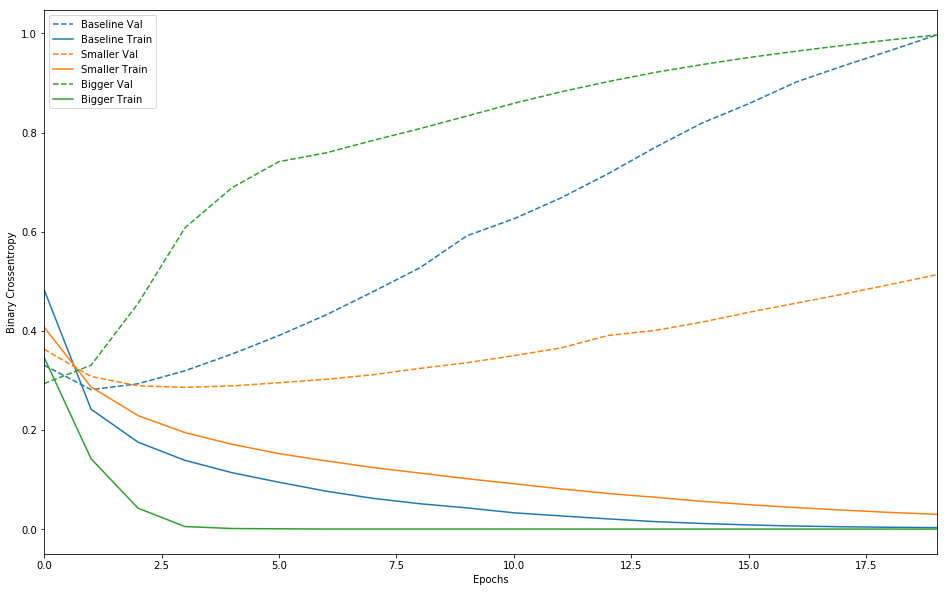

In [21]:
#plot the training and validation losses
#Proves bigger the model quickl it has tendency to remember the entire dataset
#lower validation loss indicates the better model
%matplotlib inline
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16, 10))
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key], '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    plt.xlim([0,max(history.epoch)])
plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_model_history)])


In [23]:
#weight regularization
l2_model = keras.Sequential([
    #every coefficient in the weight matrix of the layer will add 0.001
    #* weight_coefficient_value to the total loss of the network.
    keras.layers.Dense(16, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(NUM_WORDS, )),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
l2_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])
l2_model_history = l2_model.fit(train_data, train_labels, epochs=20, batch_size=20, validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 14s - loss: 0.3865 - acc: 0.8648 - binary_crossentropy: 0.3227 - val_loss: 0.3659 - val_acc: 0.8807 - val_binary_crossentropy: 0.2888
Epoch 2/20
 - 14s - loss: 0.3180 - acc: 0.9051 - binary_crossentropy: 0.2338 - val_loss: 0.3777 - val_acc: 0.8755 - val_binary_crossentropy: 0.2933
Epoch 3/20
 - 16s - loss: 0.2965 - acc: 0.9159 - binary_crossentropy: 0.2093 - val_loss: 0.4042 - val_acc: 0.8678 - val_binary_crossentropy: 0.3163
Epoch 4/20
 - 21s - loss: 0.2750 - acc: 0.9249 - binary_crossentropy: 0.1878 - val_loss: 0.4009 - val_acc: 0.8724 - val_binary_crossentropy: 0.3124
Epoch 5/20
 - 17s - loss: 0.2533 - acc: 0.9328 - binary_crossentropy: 0.1661 - val_loss: 0.4246 - val_acc: 0.8651 - val_binary_crossentropy: 0.3346
Epoch 6/20
 - 17s - loss: 0.2332 - acc: 0.9426 - binary_crossentropy: 0.1465 - val_loss: 0.4395 - val_acc: 0.8665 - val_binary_crossentropy: 0.3504
Epoch 7/20
 - 16s - loss: 0.2164 - acc: 0.9486 - binary_crosse

In [ ]:
#impact of our regularization
#the L2 regularized model has become much
#more resistant to overfitting than the baseline model, even though both models have the same number of parameters.
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [ ]:
#Adding the dropout section
dropout_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS, )),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
dropout_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])
dropout_model.summary()

In [ ]:
dropout_model_history=dropout_model.fit(train_data, train_labels,
                                        epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

In [ ]:
#impact of dropout
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])
